<a href="https://colab.research.google.com/github/manas-palai123/Tesla_Stocks_Forecasting/blob/main/Stock_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Stock Price Prediction Model**

In [ ]:
#Switch to GPU runtime for faster computation.(runtime->change runtime tpye->GPU)

## **Import all the necessary libraries**

In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
#initializing plotly
import plotly.io as pio
pio.renderers.default="colab"


## **Importing the Dataset from Yahoo Finance**

In [ ]:
df = pd.read_csv("TSLA.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-10,333.333344,353.033325,326.666656,352.706665,352.706665,91815000
1,2022-01-11,351.223328,358.616669,346.273346,354.799988,354.799988,66063300
2,2022-01-12,359.616669,371.613342,357.529999,368.739990,368.739990,83739000
3,2022-01-13,369.690002,371.866669,342.179993,343.853333,343.853333,97209900
4,2022-01-14,339.959991,350.666656,337.793335,349.869995,349.869995,72924300
...,...,...,...,...,...,...,...
245,2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157304500
246,2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
247,2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
248,2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,259.434373,265.823654,252.057107,258.553813,258.553813,8.860840e+07
std,58.844578,59.922182,57.856310,58.936343,58.936343,3.285143e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,223.041668,228.117496,216.212506,222.555000,222.555000,6.684608e+07
50%,270.706680,275.958328,261.294999,268.201660,268.201660,8.228670e+07
75%,300.982499,307.978340,292.624992,300.935005,300.935005,9.826980e+07
max,378.766663,384.290009,362.433319,381.816681,381.816681,2.314028e+08


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-10,333.333344,353.033325,326.666656,352.706665,352.706665,91815000
1,2022-01-11,351.223328,358.616669,346.273346,354.799988,354.799988,66063300
2,2022-01-12,359.616669,371.613342,357.529999,368.739990,368.739990,83739000
3,2022-01-13,369.690002,371.866669,342.179993,343.853333,343.853333,97209900
4,2022-01-14,339.959991,350.666656,337.793335,349.869995,349.869995,72924300


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157304500
246,2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
247,2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
248,2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
249,2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220575900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [ ]:
px.area(df,x="Date",y="Close",title="Date Vs Close(Price)")

In [ ]:
px.line(df,x="Date",y="Close",title="Date Vs Close(Price)")

In [ ]:
px.area(df,x="Date",y="Volume",title="Date Vs Volume")

In [ ]:
px.box(df,y='Close')

## **Data Preparation and Modelling**

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-10,333.333344,353.033325,326.666656,352.706665,352.706665,91815000
1,2022-01-11,351.223328,358.616669,346.273346,354.799988,354.799988,66063300
2,2022-01-12,359.616669,371.613342,357.529999,368.739990,368.739990,83739000
3,2022-01-13,369.690002,371.866669,342.179993,343.853333,343.853333,97209900
4,2022-01-14,339.959991,350.666656,337.793335,349.869995,349.869995,72924300
...,...,...,...,...,...,...,...
245,2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157304500
246,2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
247,2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
248,2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300


In [ ]:
columns=['Date','Close']
new_df=pd.DataFrame(df,columns=columns)

In [ ]:
new_df

,Date,Close
0,2022-01-10,352.706665
1,2022-01-11,354.799988
2,2022-01-12,368.739990
3,2022-01-13,343.853333
4,2022-01-14,349.869995
...,...,...
245,2022-12-30,123.180000
246,2023-01-03,108.099998
247,2023-01-04,113.639999
248,2023-01-05,110.339996


In [ ]:
prophet_df=new_df.rename(columns={'Date':'ds','Close':'y'})

## **Facebook Prophet Model**

In [ ]:
model = Prophet()
model.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## **Forcasting**

In [ ]:
future_df=model.make_future_dataframe(periods=30)

In [ ]:
forecast = model.predict(future_df)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-10,329.939176,293.045600,365.829059,329.939176,329.939176,-1.687196,-1.687196,-1.687196,-1.687196,-1.687196,-1.687196,0.0,0.0,0.0,328.251980
1,2022-01-11,329.542173,288.119550,358.431257,329.542173,329.542173,-4.702568,-4.702568,-4.702568,-4.702568,-4.702568,-4.702568,0.0,0.0,0.0,324.839605
2,2022-01-12,329.145169,287.362978,366.531051,329.145169,329.145169,-3.691960,-3.691960,-3.691960,-3.691960,-3.691960,-3.691960,0.0,0.0,0.0,325.453210
3,2022-01-13,328.748166,286.389641,361.260158,328.748166,328.748166,-5.332507,-5.332507,-5.332507,-5.332507,-5.332507,-5.332507,0.0,0.0,0.0,323.415659
4,2022-01-14,328.351163,283.771140,358.569009,328.351163,328.351163,-6.861034,-6.861034,-6.861034,-6.861034,-6.861034,-6.861034,0.0,0.0,0.0,321.490129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2023-02-01,96.817087,57.288614,128.943307,94.116228,99.454138,-3.691960,-3.691960,-3.691960,-3.691960,-3.691960,-3.691960,0.0,0.0,0.0,93.125128
276,2023-02-02,95.509180,53.314383,126.680859,92.654374,98.329816,-5.332507,-5.332507,-5.332507,-5.332507,-5.332507,-5.332507,0.0,0.0,0.0,90.176672
277,2023-02-03,94.201272,50.545382,123.885560,91.074601,97.163344,-6.861034,-6.861034,-6.861034,-6.861034,-6.861034,-6.861034,0.0,0.0,0.0,87.340237
278,2023-02-04,92.893364,66.886289,139.821598,89.604372,96.030080,11.137632,11.137632,11.137632,11.137632,11.137632,11.137632,0.0,0.0,0.0,104.030996


In [ ]:
prophet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      250 non-null    object 
 1   y       250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


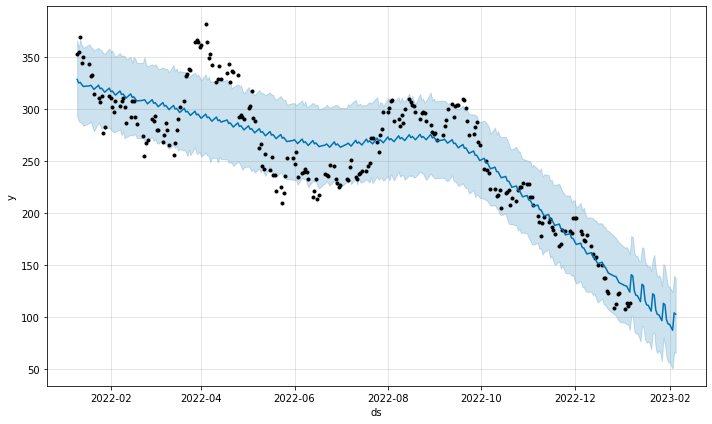

In [ ]:
figure = model.plot(forecast,xlabel='ds',ylabel='y')

## **Download Forecast Data**

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>